In [409]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection

In [410]:
train = pd.read_csv('/home/sinergia/Documents/DS_Exercises/Bank Customer Churn/Bank Churn/train.csv')
test = pd.read_csv('/home/sinergia/Documents/DS_Exercises/Bank Customer Churn/Bank Churn/test.csv')

In [411]:
train.shape

(165034, 14)

In [412]:
train.head()

id  CustomerId         Surname  CreditScore Geography Gender   Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male  33.0       3   
1   1    15749177   Okwudiliolisa          627    France   Male  33.0       1   
2   2    15694510           Hsueh          678    France   Male  40.0      10   
3   3    15741417             Kao          581    France   Male  34.0       2   
4   4    15766172       Chiemenam          716     Spain   Male  33.0       5   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              2        1.0             0.0        181449.97   
1       0.00              2        1.0             1.0         49503.50   
2       0.00              2        1.0             0.0        184866.69   
3  148882.54              1        1.0             1.0         84560.88   
4       0.00              2        1.0             1.0         15068.83   

   Exited  
0       0  
1       0  
2       0  
3       0  
4       0

In [413]:
train.dtypes

id                   int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

In [414]:
train.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [415]:
train.corr()

/tmp/ipykernel_6152/2189804198.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


id  CustomerId  CreditScore       Age    Tenure  \
id               1.000000   -0.000387    -0.001201  0.004039 -0.002560   
CustomerId      -0.000387    1.000000     0.007364  0.002696 -0.001252   
CreditScore     -0.001201    0.007364     1.000000 -0.008918  0.000942   
Age              0.004039    0.002696    -0.008918  1.000000 -0.010830   
Tenure          -0.002560   -0.001252     0.000942 -0.010830  1.000000   
Balance          0.000606   -0.008348     0.006973  0.064318 -0.009481   
NumOfProducts   -0.000094    0.004380     0.011361 -0.102195  0.007335   
HasCrCard       -0.004706   -0.005469    -0.002828 -0.012111  0.005327   
IsActiveMember   0.000418   -0.002934     0.014790  0.003320 -0.005532   
EstimatedSalary -0.001552    0.002891    -0.001820 -0.005399  0.000971   
Exited           0.002512   -0.009947    -0.027383  0.340768 -0.019565   

                  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
id               0.000606      -0.000094  -0.004706        0.000418   
CustomerId      -0.008348       0.004380  -0.005469       -0.002934   
CreditScore      0.006973       0.011361  -0.002828        0.014790   
Age              0.064318      -0.102195  -0.012111        0.003320   
Tenure          -0.009481       0.007335   0.005327       -0.005532   
Balance          1.000000      -0.361033  -0.018584       -0.015073   
NumOfProducts   -0.361033       1.000000   0.005482        0.039736   
HasCrCard       -0.018584       0.005482   1.000000       -0.021034   
IsActiveMember  -0.015073       0.039736  -0.021034        1.000000   
EstimatedSalary  0.008586      -0.004285   0.004438       -0.008080   
Exited           0.129743      -0.214554  -0.022141       -0.210237   

                 EstimatedSalary    Exited  
id                     -0.001552  0.002512  
CustomerId              0.002891 -0.009947  
CreditScore            -0.001820 -0.027383  
Age                    -0.005399  0.340768  
Tenure                  0.000971 -0.019565  
Balance                 0.008586  0.129743  
NumOfProducts          -0.004285 -0.214554  
HasCrCard               0.004438 -0.022141  
IsActiveMember         -0.008080 -0.210237  
EstimatedSalary         1.000000  0.018827  
Exited                  0.018827  1.000000

# Data Cleaning

In [416]:
train.head()

id  CustomerId         Surname  CreditScore Geography Gender   Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male  33.0       3   
1   1    15749177   Okwudiliolisa          627    France   Male  33.0       1   
2   2    15694510           Hsueh          678    France   Male  40.0      10   
3   3    15741417             Kao          581    France   Male  34.0       2   
4   4    15766172       Chiemenam          716     Spain   Male  33.0       5   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              2        1.0             0.0        181449.97   
1       0.00              2        1.0             1.0         49503.50   
2       0.00              2        1.0             0.0        184866.69   
3  148882.54              1        1.0             1.0         84560.88   
4       0.00              2        1.0             1.0         15068.83   

   Exited  
0       0  
1       0  
2       0  
3       0  
4       0

In [417]:
train.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [418]:
train[['CustomerId', 'CreditScore',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']].describe()

CustomerId    CreditScore            Age         Tenure  \
count  1.650340e+05  165034.000000  165034.000000  165034.000000   
mean   1.569201e+07     656.454373      38.125888       5.020353   
std    7.139782e+04      80.103340       8.867205       2.806159   
min    1.556570e+07     350.000000      18.000000       0.000000   
25%    1.563314e+07     597.000000      32.000000       3.000000   
50%    1.569017e+07     659.000000      37.000000       5.000000   
75%    1.575682e+07     710.000000      42.000000       7.000000   
max    1.581569e+07     850.000000      92.000000      10.000000   

             Balance  NumOfProducts  EstimatedSalary  
count  165034.000000  165034.000000    165034.000000  
mean    55478.086689       1.554455    112574.822734  
std     62817.663278       0.547154     50292.865585  
min         0.000000       1.000000        11.580000  
25%         0.000000       1.000000     74637.570000  
50%         0.000000       2.000000    117948.000000  
75%    119939.517500       2.000000    155152.467500  
max    250898.090000       4.000000    199992.480000

In [419]:
train.Geography.value_counts()

France     94215
Spain      36213
Germany    34606
Name: Geography, dtype: int64

<Axes: xlabel='Count', ylabel='Tenure'>

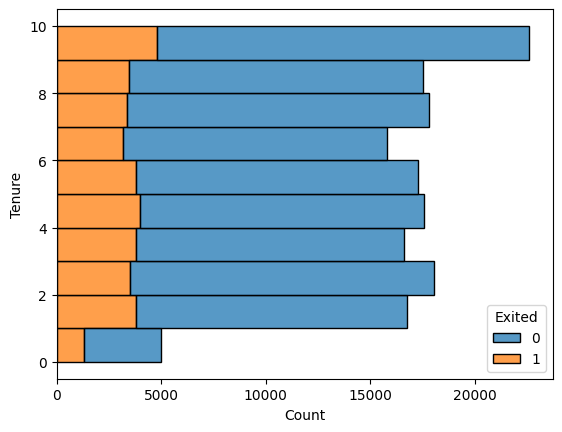

In [420]:
sns.histplot(data=train, y="Tenure", binwidth=1, hue='Exited', multiple='stack')

<Axes: xlabel='Count', ylabel='NumOfProducts'>

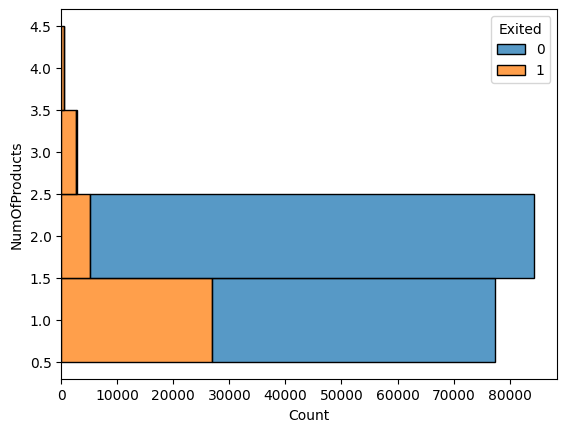

In [421]:
sns.histplot(data=train, y="NumOfProducts", binwidth=1, hue='Exited', multiple='stack', discrete=True)

<Axes: xlabel='Count', ylabel='Age'>

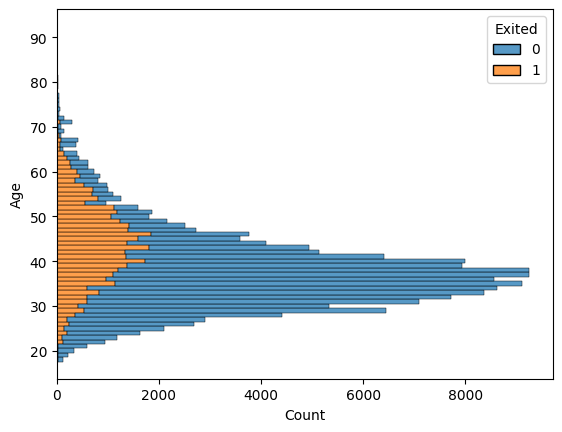

In [422]:
sns.histplot(data=train, y="Age", binwidth=1, hue='Exited', multiple='stack', discrete=True)

<Axes: xlabel='Balance', ylabel='Density'>

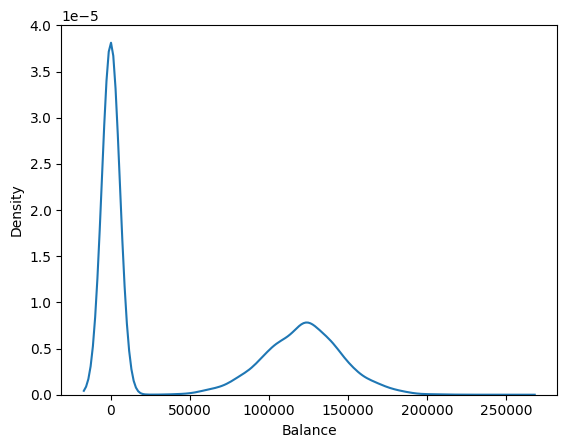

In [423]:
sns.kdeplot(data=train, x="Balance")

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

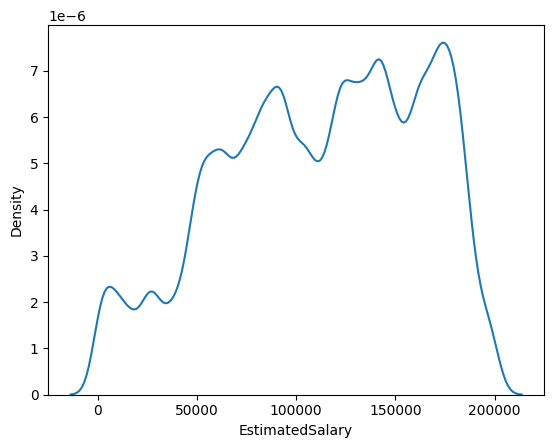

In [424]:
sns.kdeplot(data=train, x="EstimatedSalary")

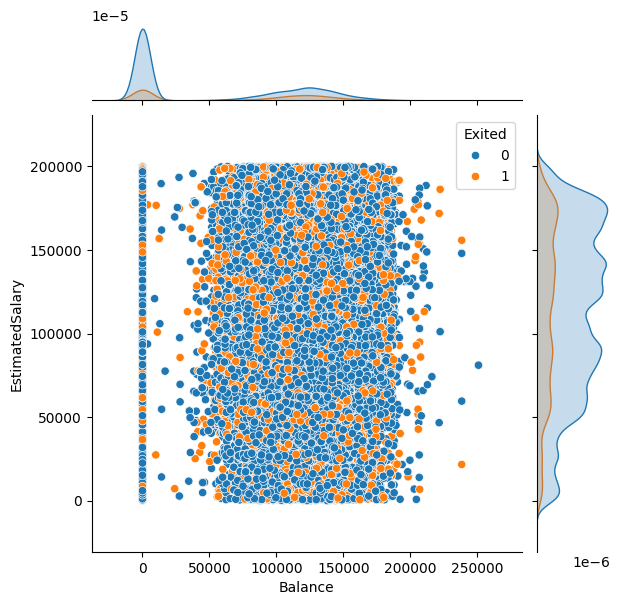

In [425]:
sns.jointplot(data=train, x="Balance", y="EstimatedSalary", hue="Exited")

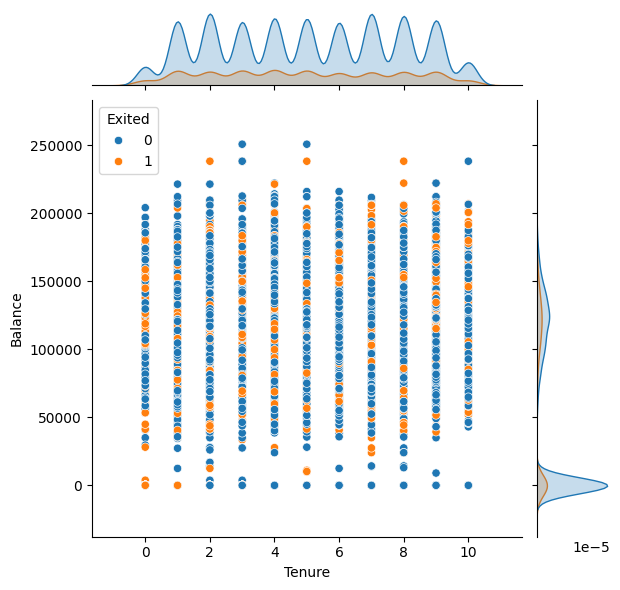

In [426]:
sns.jointplot(data=train, x="Tenure", y="Balance", hue="Exited")

In [427]:
train.corr()

/tmp/ipykernel_6152/2189804198.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


id  CustomerId  CreditScore       Age    Tenure  \
id               1.000000   -0.000387    -0.001201  0.004039 -0.002560   
CustomerId      -0.000387    1.000000     0.007364  0.002696 -0.001252   
CreditScore     -0.001201    0.007364     1.000000 -0.008918  0.000942   
Age              0.004039    0.002696    -0.008918  1.000000 -0.010830   
Tenure          -0.002560   -0.001252     0.000942 -0.010830  1.000000   
Balance          0.000606   -0.008348     0.006973  0.064318 -0.009481   
NumOfProducts   -0.000094    0.004380     0.011361 -0.102195  0.007335   
HasCrCard       -0.004706   -0.005469    -0.002828 -0.012111  0.005327   
IsActiveMember   0.000418   -0.002934     0.014790  0.003320 -0.005532   
EstimatedSalary -0.001552    0.002891    -0.001820 -0.005399  0.000971   
Exited           0.002512   -0.009947    -0.027383  0.340768 -0.019565   

                  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
id               0.000606      -0.000094  -0.004706        0.000418   
CustomerId      -0.008348       0.004380  -0.005469       -0.002934   
CreditScore      0.006973       0.011361  -0.002828        0.014790   
Age              0.064318      -0.102195  -0.012111        0.003320   
Tenure          -0.009481       0.007335   0.005327       -0.005532   
Balance          1.000000      -0.361033  -0.018584       -0.015073   
NumOfProducts   -0.361033       1.000000   0.005482        0.039736   
HasCrCard       -0.018584       0.005482   1.000000       -0.021034   
IsActiveMember  -0.015073       0.039736  -0.021034        1.000000   
EstimatedSalary  0.008586      -0.004285   0.004438       -0.008080   
Exited           0.129743      -0.214554  -0.022141       -0.210237   

                 EstimatedSalary    Exited  
id                     -0.001552  0.002512  
CustomerId              0.002891 -0.009947  
CreditScore            -0.001820 -0.027383  
Age                    -0.005399  0.340768  
Tenure                  0.000971 -0.019565  
Balance                 0.008586  0.129743  
NumOfProducts          -0.004285 -0.214554  
HasCrCard               0.004438 -0.022141  
IsActiveMember         -0.008080 -0.210237  
EstimatedSalary         1.000000  0.018827  
Exited                  0.018827  1.000000

/tmp/ipykernel_6152/1524494364.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr())


<Axes: >

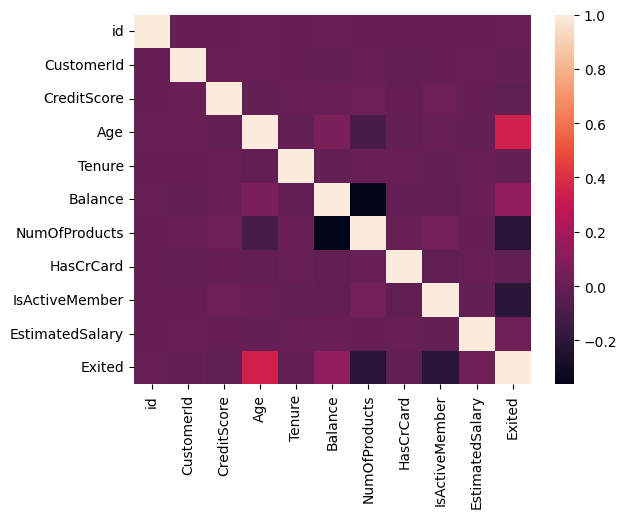

In [428]:
sns.heatmap(train.corr())

In [429]:
train.describe()

id    CustomerId    CreditScore            Age         Tenure  \
count  165034.0000  1.650340e+05  165034.000000  165034.000000  165034.000000   
mean    82516.5000  1.569201e+07     656.454373      38.125888       5.020353   
std     47641.3565  7.139782e+04      80.103340       8.867205       2.806159   
min         0.0000  1.556570e+07     350.000000      18.000000       0.000000   
25%     41258.2500  1.563314e+07     597.000000      32.000000       3.000000   
50%     82516.5000  1.569017e+07     659.000000      37.000000       5.000000   
75%    123774.7500  1.575682e+07     710.000000      42.000000       7.000000   
max    165033.0000  1.581569e+07     850.000000      92.000000      10.000000   

             Balance  NumOfProducts      HasCrCard  IsActiveMember  \
count  165034.000000  165034.000000  165034.000000   165034.000000   
mean    55478.086689       1.554455       0.753954        0.497770   
std     62817.663278       0.547154       0.430707        0.499997   
min         0.000000       1.000000       0.000000        0.000000   
25%         0.000000       1.000000       1.000000        0.000000   
50%         0.000000       2.000000       1.000000        0.000000   
75%    119939.517500       2.000000       1.000000        1.000000   
max    250898.090000       4.000000       1.000000        1.000000   

       EstimatedSalary         Exited  
count    165034.000000  165034.000000  
mean     112574.822734       0.211599  
std       50292.865585       0.408443  
min          11.580000       0.000000  
25%       74637.570000       0.000000  
50%      117948.000000       0.000000  
75%      155152.467500       0.000000  
max      199992.480000       1.000000

In [430]:
def encoding_df(df):

    #Creating a customer response column
    prob_lower_than_5 = 0.1
    
    # Generate random integers for the entire column
    df['CustomerResponse'] = np.random.randint(1, 11, size=len(df))
    
    if 'Exited' in df.columns:
        mask = (df['Exited'] == 1) & (np.random.rand(len(df)) > prob_lower_than_5)
        df.loc[mask, 'CustomerResponse'] = np.random.randint(1, 5, size=mask.sum())
     
    df['IsActiveMember'] = df['IsActiveMember'].fillna(False)

    # Combining the columns NumOfProducts and IsActiveMember
    df['ActiveAndFewProducts'] = (df['IsActiveMember'].astype(bool)) & (df['NumOfProducts'].fillna(0) <= 2)

    #Combining the columns NumOfProducts and IsActiveMember
    df['CreditAge'] = (df['CreditScore'] >= 690) & (df['Age'].between(30,40, inclusive='both'))
    
    #Binning age
    bins_age = [0, 18, 25, 28, 32, 37, float('inf')]
    names_age = ['Under_18', '18_25', '25_28', '18_32', '32_37','Above_37']
    df['Age'] = pd.cut(pd.to_numeric(df['Age'], errors='coerce'), bins_age, labels=names_age)

    #Binning_Credt_Score
    bins_credit = [0, 579, 669, 739, 799, float('inf')]
    names_credit = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']
    df['CreditScore'] = pd.cut(pd.to_numeric(df['CreditScore'], errors='coerce'), bins_credit, labels=names_credit)

    #Binning_Balance
    bins_balance = [0, 120000, 150000, 180000, 210000, float('inf')]
    names_balance = ['0_120000', '120000_150000', '150000_180000', '180000_210000', 'Above_210000']
    df['Balance'] = pd.cut(pd.to_numeric(df['Balance'], errors='coerce'), bins_balance, labels=names_balance)    

    #Binning_Estimated_Salary
    bins_salary = [0, 75000, 120000, 160000, float('inf')]
    names_salary = ['0_75000', '75000_120000', '120000_160000', 'Above_160000']
    df['EstimatedSalary'] = pd.cut(pd.to_numeric(df['EstimatedSalary'], errors='coerce'), bins_salary, labels=names_salary)        
    
    cols_to_bool = ['HasCrCard', 'IsActiveMember']
    df[cols_to_bool] = df[cols_to_bool].replace({1: True, 0: False})

    cols_to_encode = ['Surname', 'Tenure', 'Geography', 'Gender', 'Age', 'NumOfProducts', 'CreditScore','Balance','EstimatedSalary']
    df = pd.get_dummies(df, columns=cols_to_encode)
    return df

In [431]:
train = encoding_df(train)

In [432]:
train[['CustomerResponse','Exited']]

CustomerResponse  Exited
0                      5       0
1                      2       0
2                     10       0
3                     10       0
4                      5       0
...                  ...     ...
165029                 1       0
165030                 9       0
165031                 4       0
165032                10       0
165033                 3       1

[165034 rows x 2 columns]

In [433]:
train.isnull().sum()

id                               0
CustomerId                       0
HasCrCard                        0
IsActiveMember                   0
Exited                           0
                                ..
Balance_Above_210000             0
EstimatedSalary_0_75000          0
EstimatedSalary_75000_120000     0
EstimatedSalary_120000_160000    0
EstimatedSalary_Above_160000     0
Length: 2845, dtype: int64

In [434]:
train.filter(regex='Credit').columns.tolist

<bound method IndexOpsMixin.tolist of Index(['CreditAge', 'CreditScore_Poor', 'CreditScore_Fair', 'CreditScore_Good',
       'CreditScore_Very Good', 'CreditScore_Excellent'],
      dtype='object')>

# Train-Test Split

In [435]:
train.dtypes

id                               int64
CustomerId                       int64
HasCrCard                         bool
IsActiveMember                    bool
Exited                           int64
                                 ...  
Balance_Above_210000             uint8
EstimatedSalary_0_75000          uint8
EstimatedSalary_75000_120000     uint8
EstimatedSalary_120000_160000    uint8
EstimatedSalary_Above_160000     uint8
Length: 2845, dtype: object

In [436]:
X = train[['HasCrCard','IsActiveMember', 'CustomerResponse',
           'CreditAge','ActiveAndFewProducts',
           'EstimatedSalary_0_75000', 'EstimatedSalary_75000_120000',
       'EstimatedSalary_120000_160000', 'EstimatedSalary_Above_160000',
        'Balance_0_120000', 'Balance_120000_150000', 'Balance_150000_180000',
       'Balance_180000_210000', 'Balance_Above_210000',
    # 'Tenure_0','Tenure_1', 'Tenure_2', 'Tenure_3', 'Tenure_4', 'Tenure_5', 'Tenure_6',
    #    'Tenure_7', 'Tenure_8', 'Tenure_9', 'Tenure_10', 
        'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male',
        'Age_Under_18', 'Age_18_32', 'Age_32_37', 'Age_Above_37',
        'NumOfProducts_1', 'NumOfProducts_2', 'NumOfProducts_3','NumOfProducts_4', 
        'CreditScore_Poor', 'CreditScore_Fair', 'CreditScore_Good',
       'CreditScore_Very Good', 'CreditScore_Excellent',
        "Surname_Ch'ang", "Surname_Ch'iu", 'Surname_Fanucci',"Surname_Ch'ien"
]]

y = train['Exited']

# Model Building

## Using RFC

Accuracy:  0.8645741812342836  Precision:  0.6948659003831418  Recall:  0.6465136175673749 F1-Score:  0.6698182892598611


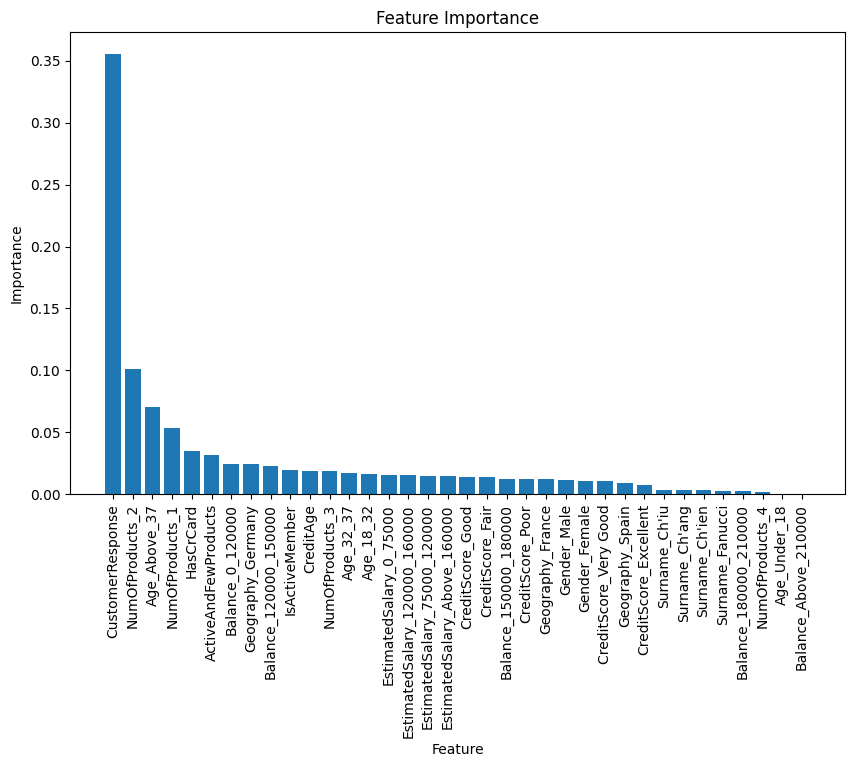

In [437]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2, SelectKBest

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf_rfc = RandomForestClassifier(criterion="entropy", random_state=100)
clf_rfc.fit(X_train, Y_train)
yhat_rfc = clf_rfc.predict(X_test)

feature_importances = clf_rfc.feature_importances_

f1 = f1_score(Y_test, yhat_rfc)
precision = precision_score(Y_test, yhat_rfc)
recall = recall_score(Y_test, yhat_rfc)
print("Accuracy: ", accuracy_score(Y_test, yhat_rfc), ' Precision: ', precision, ' Recall: ',recall,"F1-Score: ",f1)
feature_names = list(X.columns) 

feature_importance_tuples = list(zip(feature_names, feature_importances))
feature_importance_tuples.sort(key=lambda x: x[1], reverse=True)

sorted_feature_names, sorted_feature_importances = zip(*feature_importance_tuples)

plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names, rotation='vertical')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

## Using DTC

In [438]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2, SelectKBest

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

for i in range(1,16):
    clf_tree = DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=i)
    clf_tree.fit(X_train, Y_train)
    yhat_tree = clf_tree.predict(X_test)
    print('Depth:',i,'Accuracy:', accuracy_score(Y_test, yhat_tree))

Depth: 1 Accuracy: 0.7875299178962039
Depth: 2 Accuracy: 0.8322477050322659
Depth: 3 Accuracy: 0.8677856212318599
Depth: 4 Accuracy: 0.8677856212318599
Depth: 5 Accuracy: 0.8731178234919865
Depth: 6 Accuracy: 0.8784500257521132
Depth: 7 Accuracy: 0.8801769321659042
Depth: 8 Accuracy: 0.8822976944284545
Depth: 9 Accuracy: 0.882903626503469
Depth: 10 Accuracy: 0.8830854061259733
Depth: 11 Accuracy: 0.8818735419759445
Depth: 12 Accuracy: 0.8805101948071621
Depth: 13 Accuracy: 0.8797830763171448
Depth: 14 Accuracy: 0.8758142212258005
Depth: 15 Accuracy: 0.8732087133032387


In [439]:
clf_tree = DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=10)
clf_tree.fit(X_train, Y_train)
yhat_tree = clf_tree.predict(X_test)
print("Accuracy: ", accuracy_score(Y_test, yhat_tree), ' Precision: ', precision, ' Recall: ',recall,"F1-Score: ",f1)

Accuracy:  0.8830854061259733  Precision:  0.6948659003831418  Recall:  0.6465136175673749 F1-Score:  0.6698182892598611


# Confusion Matrix

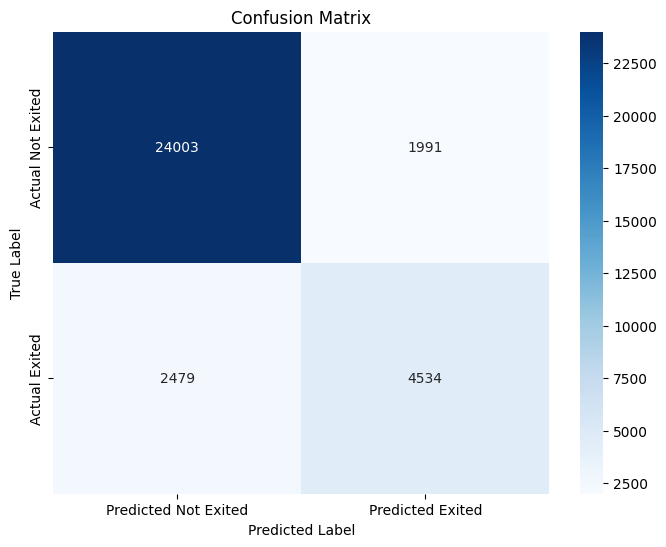

In [440]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(Y_test, yhat_rfc)

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Predicted Not Exited', 'Predicted Exited'], yticklabels=['Actual Not Exited', 'Actual Exited'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Predicting test data

In [441]:
test.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [442]:
test.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [443]:
test = encoding_df(test)

In [444]:
test = test[['HasCrCard','IsActiveMember', 'CustomerResponse',
           'CreditAge','ActiveAndFewProducts',
           'EstimatedSalary_0_75000', 'EstimatedSalary_75000_120000',
       'EstimatedSalary_120000_160000', 'EstimatedSalary_Above_160000',
        'Balance_0_120000', 'Balance_120000_150000', 'Balance_150000_180000',
       'Balance_180000_210000', 'Balance_Above_210000',
    # 'Tenure_0','Tenure_1', 'Tenure_2', 'Tenure_3', 'Tenure_4', 'Tenure_5', 'Tenure_6',
    #    'Tenure_7', 'Tenure_8', 'Tenure_9', 'Tenure_10', 
        'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male',
        'Age_Under_18', 'Age_18_32', 'Age_32_37', 'Age_Above_37',
        'NumOfProducts_1', 'NumOfProducts_2', 'NumOfProducts_3','NumOfProducts_4', 
        'CreditScore_Poor', 'CreditScore_Fair', 'CreditScore_Good',
       'CreditScore_Very Good', 'CreditScore_Excellent',
        "Surname_Ch'ang", "Surname_Ch'iu", 'Surname_Fanucci',"Surname_Ch'ien"]]